In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pathlib
from skimage import io
import time

%matplotlib inline

In [2]:
# self-written scripts
import sys
sys.path.insert(0, 'Python_Scripts')

import util
import surf_handling
import surf_hog_analysis

In [3]:
df = pd.read_csv('data/train_complete.csv')

In [4]:
df_defectless = df.query('Defect == 0')

In [5]:
df_defectless

,FilePath,ImageId,ClassId,EncodedPixels,Defect
7095,/Users/fabioteichmann/neuefische/projects/Caps...,0dced41aa.jpg,0,0,0
7096,/Users/fabioteichmann/neuefische/projects/Caps...,bd2366c49.jpg,0,0,0
7097,/Users/fabioteichmann/neuefische/projects/Caps...,18076ccc9.jpg,0,0,0
7098,/Users/fabioteichmann/neuefische/projects/Caps...,b3f6a891f.jpg,0,0,0
7099,/Users/fabioteichmann/neuefische/projects/Caps...,16730239e.jpg,0,0,0
...,...,...,...,...,...
12992,/Users/fabioteichmann/neuefische/projects/Caps...,fcc7c9c3c.jpg,0,0,0
12993,/Users/fabioteichmann/neuefische/projects/Caps...,d81c1025c.jpg,0,0,0
12994,/Users/fabioteichmann/neuefische/projects/Caps...,ea56440ac.jpg,0,0,0
12995,/Users/fabioteichmann/neuefische/projects/Caps...,cc00b69e7.jpg,0,0,0


In [6]:
def add_keypoints_to_frame(df, surf_object):
    # prepare dictionary to gather data
    surf_images = {'keypoints': [],
                   'ImageId': [],
                   'NumberKP': []
                  }

    print('processing images...')
    start = time.time()

    for idx, image_id in enumerate(df.ImageId):
        surf_images['ImageId'].append(image_id)

        # `image` so far holds just the path to the image. Convert to image file
        image = io.imread("data/train_images/" + image_id)
        # Find keypoints and descriptors directly
        kp, des = surf_object.detectAndCompute(image, None)

        surf_images['keypoints'].append(kp)
        surf_images['NumberKP'].append(len(kp))
        if idx % 500 == 0 and idx != 0:
            print(f'image number {idx} processed...')

    end = time.time()
    print('processing done.')
    print('required time:', end - start)
    
    temp = pd.DataFrame.from_dict(surf_images)
    
    return df.merge(temp, on='ImageId')

In [7]:
surf = cv2.xfeatures2d.SURF_create(400)

In [8]:
df_defectless_with_kp = add_keypoints_to_frame(df_defectless, surf)

processing images...
image number 500 processed...
image number 1000 processed...
image number 1500 processed...
image number 2000 processed...
image number 2500 processed...
image number 3000 processed...
image number 3500 processed...
image number 4000 processed...
image number 4500 processed...
image number 5000 processed...
image number 5500 processed...
processing done.
required time: 114.4016261100769


In [9]:
defectless_complete = util.add_blackness_attributes(df_defectless_with_kp, 'train_images')

In [10]:
defectless_complete

,FilePath,ImageId,ClassId,EncodedPixels,Defect,keypoints,NumberKP,BlackColumns,PercentageBlack
0,/Users/fabioteichmann/neuefische/projects/Caps...,0dced41aa.jpg,0,0,0,"(<KeyPoint 0x105c3e9f0>, <KeyPoint 0x105c3e750...",3186,0,0.000000
1,/Users/fabioteichmann/neuefische/projects/Caps...,bd2366c49.jpg,0,0,0,"(<KeyPoint 0x11ffb4d20>, <KeyPoint 0x11ffb4d50...",1068,0,0.000000
2,/Users/fabioteichmann/neuefische/projects/Caps...,18076ccc9.jpg,0,0,0,"(<KeyPoint 0x11ffc18a0>, <KeyPoint 0x11ffc18d0...",4,1417,0.885625
3,/Users/fabioteichmann/neuefische/projects/Caps...,b3f6a891f.jpg,0,0,0,"(<KeyPoint 0x11ffc1ae0>, <KeyPoint 0x11ffc19f0...",39,935,0.584375
4,/Users/fabioteichmann/neuefische/projects/Caps...,16730239e.jpg,0,0,0,"(<KeyPoint 0x11ffc20f0>, <KeyPoint 0x11ffc2120...",1156,705,0.440625
...,...,...,...,...,...,...,...,...,...
5897,/Users/fabioteichmann/neuefische/projects/Caps...,fcc7c9c3c.jpg,0,0,0,"(<KeyPoint 0x28ae8c2d0>, <KeyPoint 0x28ae8c300...",202,785,0.490625
5898,/Users/fabioteichmann/neuefische/projects/Caps...,d81c1025c.jpg,0,0,0,"(<KeyPoint 0x28ae8e930>, <KeyPoint 0x28ae8e960...",364,0,0.000000
5899,/Users/fabioteichmann/neuefische/projects/Caps...,ea56440ac.jpg,0,0,0,"(<KeyPoint 0x28ae92e70>, <KeyPoint 0x28ae92ea0...",356,151,0.094375
5900,/Users/fabioteichmann/neuefische/projects/Caps...,cc00b69e7.jpg,0,0,0,"(<KeyPoint 0x28ae97270>, <KeyPoint 0x28ae972a0...",1261,0,0.000000


In [11]:
defectless_complete.query('PercentageBlack <= 0.5 and NumberKP < 51')

,FilePath,ImageId,ClassId,EncodedPixels,Defect,keypoints,NumberKP,BlackColumns,PercentageBlack
6,/Users/fabioteichmann/neuefische/projects/Caps...,8ccbb95e1.jpg,0,0,0,"(<KeyPoint 0x12d40bab0>, <KeyPoint 0x12d40bae0...",47,0,0.000000
7,/Users/fabioteichmann/neuefische/projects/Caps...,4cf93f820.jpg,0,0,0,"(<KeyPoint 0x12d40d480>, <KeyPoint 0x12d40d4b0...",16,452,0.282500
16,/Users/fabioteichmann/neuefische/projects/Caps...,c92d8ef22.jpg,0,0,0,(),0,519,0.324375
24,/Users/fabioteichmann/neuefische/projects/Caps...,b482a5d55.jpg,0,0,0,"(<KeyPoint 0x12d45d9f0>, <KeyPoint 0x12d45da20...",14,0,0.000000
31,/Users/fabioteichmann/neuefische/projects/Caps...,b9f8d4019.jpg,0,0,0,"(<KeyPoint 0x12d4a1e10>,)",1,0,0.000000
...,...,...,...,...,...,...,...,...,...
5861,/Users/fabioteichmann/neuefische/projects/Caps...,19f3fd5f9.jpg,0,0,0,"(<KeyPoint 0x28adc7f60>, <KeyPoint 0x28adc7f90...",5,0,0.000000
5869,/Users/fabioteichmann/neuefische/projects/Caps...,90cea0761.jpg,0,0,0,"(<KeyPoint 0x28addbcf0>,)",1,0,0.000000
5883,/Users/fabioteichmann/neuefische/projects/Caps...,804caac5a.jpg,0,0,0,"(<KeyPoint 0x28ae31e70>, <KeyPoint 0x28ae31ea0...",6,0,0.000000
5889,/Users/fabioteichmann/neuefische/projects/Caps...,903d4e8ce.jpg,0,0,0,"(<KeyPoint 0x28ae4f4e0>, <KeyPoint 0x28ae4f510...",48,177,0.110625


In [12]:
num_kp_list_sorted = df_defectless_with_kp.sort_values(by='NumberKP', ascending=True).NumberKP.to_numpy()
num_kp_list = df_defectless_with_kp.NumberKP.to_numpy()

In [17]:
num_kp_list_sorted[:1000]

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  3,  3,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,
        3,  4,  4,  4,  4

In [14]:
#np.where(num_kp_list < 51)

In [15]:
defectless_kp_less_51 = df_defectless_with_kp.query('NumberKP < 51')
defectless_kp_less_51

,FilePath,ImageId,ClassId,EncodedPixels,Defect,keypoints,NumberKP
2,/Users/fabioteichmann/neuefische/projects/Caps...,18076ccc9.jpg,0,0,0,"(<KeyPoint 0x11ffc18a0>, <KeyPoint 0x11ffc18d0...",4
3,/Users/fabioteichmann/neuefische/projects/Caps...,b3f6a891f.jpg,0,0,0,"(<KeyPoint 0x11ffc1ae0>, <KeyPoint 0x11ffc19f0...",39
6,/Users/fabioteichmann/neuefische/projects/Caps...,8ccbb95e1.jpg,0,0,0,"(<KeyPoint 0x12d40bab0>, <KeyPoint 0x12d40bae0...",47
7,/Users/fabioteichmann/neuefische/projects/Caps...,4cf93f820.jpg,0,0,0,"(<KeyPoint 0x12d40d480>, <KeyPoint 0x12d40d4b0...",16
10,/Users/fabioteichmann/neuefische/projects/Caps...,6fa4ec1d0.jpg,0,0,0,"(<KeyPoint 0x12d413e40>, <KeyPoint 0x12d413e70...",3
...,...,...,...,...,...,...,...
5869,/Users/fabioteichmann/neuefische/projects/Caps...,90cea0761.jpg,0,0,0,"(<KeyPoint 0x28addbcf0>,)",1
5870,/Users/fabioteichmann/neuefische/projects/Caps...,3256b55d4.jpg,0,0,0,"(<KeyPoint 0x28addbd20>, <KeyPoint 0x28addbd50>)",2
5883,/Users/fabioteichmann/neuefische/projects/Caps...,804caac5a.jpg,0,0,0,"(<KeyPoint 0x28ae31e70>, <KeyPoint 0x28ae31ea0...",6
5889,/Users/fabioteichmann/neuefische/projects/Caps...,903d4e8ce.jpg,0,0,0,"(<KeyPoint 0x28ae4f4e0>, <KeyPoint 0x28ae4f510...",48


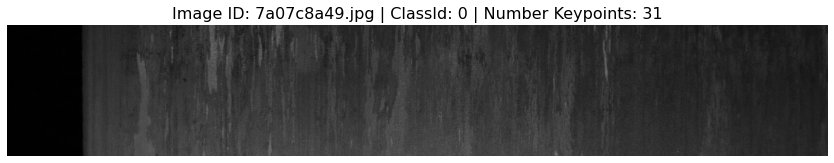

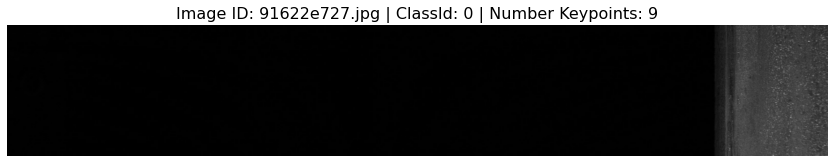

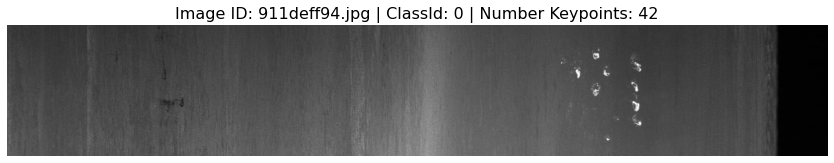

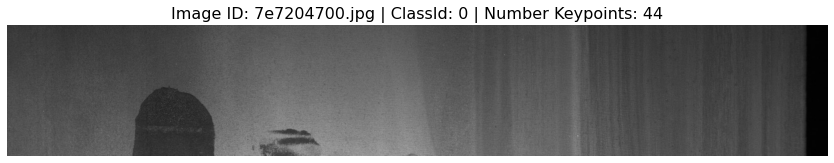

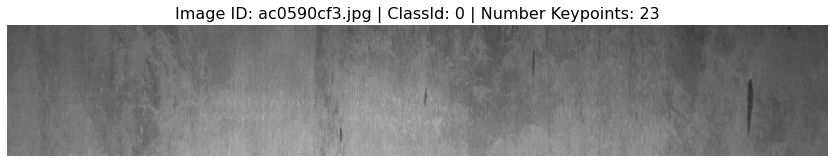

In [18]:
surf_hog_analysis.print_batch(defectless_kp_less_51, defectless_kp_less_51.ClassId, show_keypoints=True)